In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Dataset/spam.csv', encoding="latin1")


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
151,ham,Yup i thk cine is better cos no need 2 go down...,NaN,NaN,NaN
1497,ham,I'm putting it on now. It should be ready for ...,NaN,NaN,NaN
3457,ham,Have your lunch and come quickly and open the ...,NaN,NaN,NaN
2186,ham,So is there anything specific I should be doin...,NaN,NaN,NaN
125,ham,"Good stuff, will do.",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
387,ham,Mm that time you dont like fun
5444,ham,Good morning. At the repair shop--the ONLY rea...
672,spam,Get ur 1st RINGTONE FREE NOW! Reply to this ms...
5237,spam,Someonone you know is trying to contact you vi...
1653,ham,I was at bugis juz now wat... But now i'm walk...


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1508,ham,Sounds like something that someone testing me ...
4956,ham,I'm vivek:)i got call from your number.
1580,ham,"I shall book chez jules for half eight, if tha..."
2417,ham,Oh... Lk tt den we take e one tt ends at cine ...
2751,ham,Play w computer? Aiyah i tok 2 u lor?


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

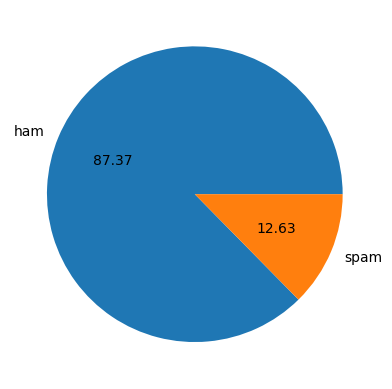

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [135]:
# Data is imbalanced

In [21]:
import nltk

In [137]:
!pip install nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pujashrestha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.00000,5169.000000,5169.000000
mean,79.23196,18.455794,1.965564
std,58.33921,13.324758,1.448541
min,2.00000,1.000000,1.000000
25%,36.00000,9.000000,1.000000
50%,61.00000,15.000000,1.000000
75%,117.00000,26.000000,2.000000
max,910.00000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.684234,17.123782,1.820195
std,56.435582,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,138.346095,27.667688,2.970904
std,30.261787,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


In [32]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

<Axes: xlabel='num_characters', ylabel='Count'>

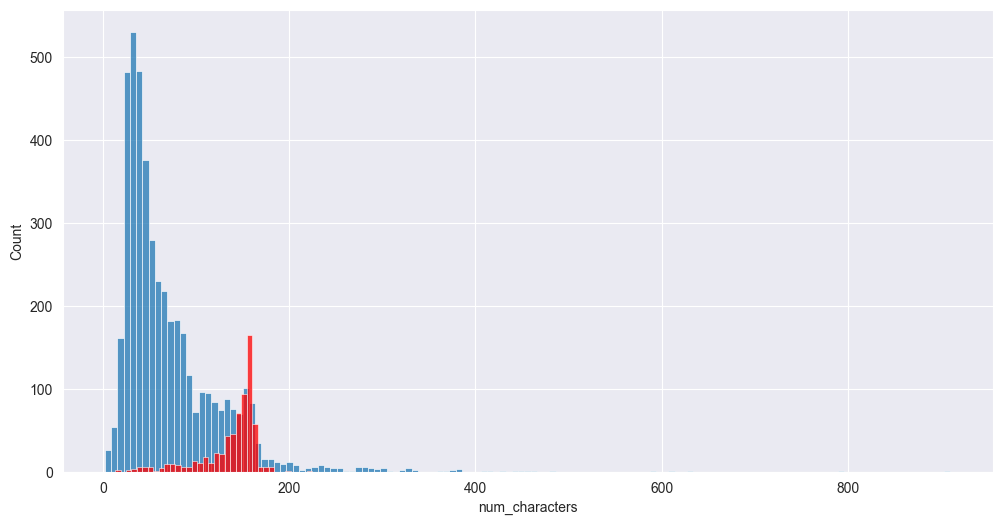

In [149]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

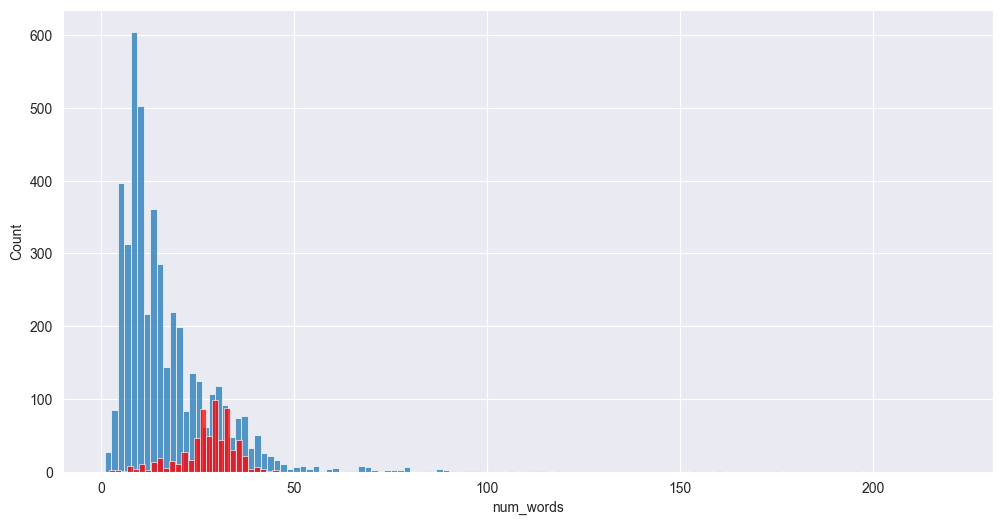

In [150]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

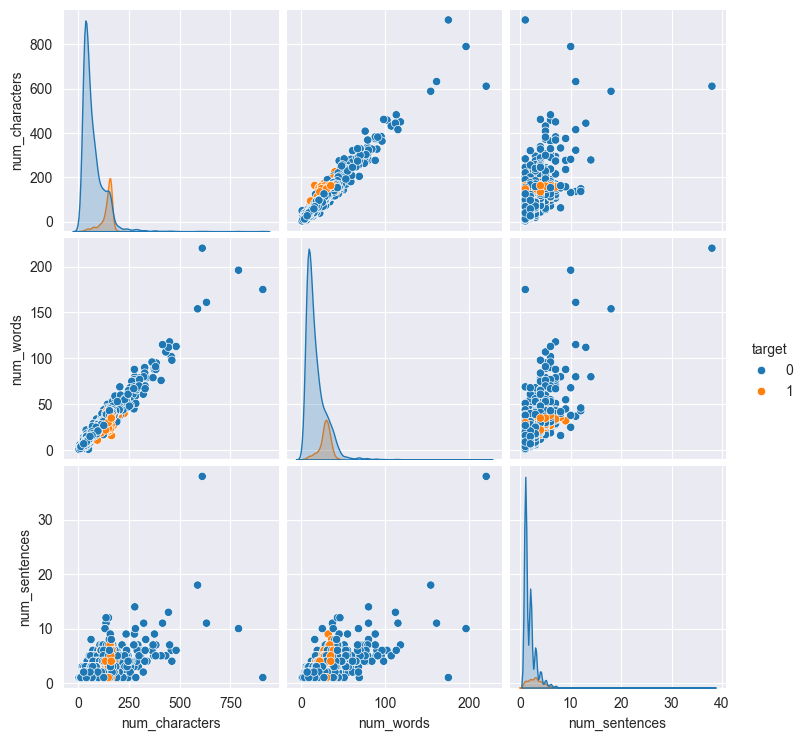

In [151]:
sns.pairplot(df,hue='target')

<Axes: >

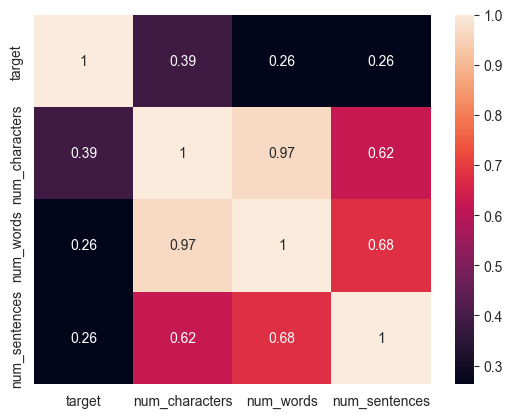

In [152]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numerical_df.corr(), annot=True)


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [153]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [154]:
import string
from nltk.corpus import stopwords

def transform_text(text):
    y = []
    text = text.lower().split()
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    return text

# Example usage
transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
print(transformed_text)


["i'm", 'gonna', 'home', 'soon', 'want', 'talk', 'stuff', 'anymore', 'tonight,', 'k?', "i've", 'cried', 'enough', 'today.']


In [155]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [156]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [157]:
df['transformed_text'] = df['text'].apply(transform_text)

In [158]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point,, crazy.., available, bugis..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar..., joking, wif, u, oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, early, hor..., u, c, already, sa..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goes, usf,, lives, around, though]"


In [159]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [160]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [161]:
# Convert non-string values to strings
df['transformed_text'] = df['transformed_text'].astype(str)

# Concatenate the transformed text of spam messages
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")

# Now you can proceed to generate the word cloud


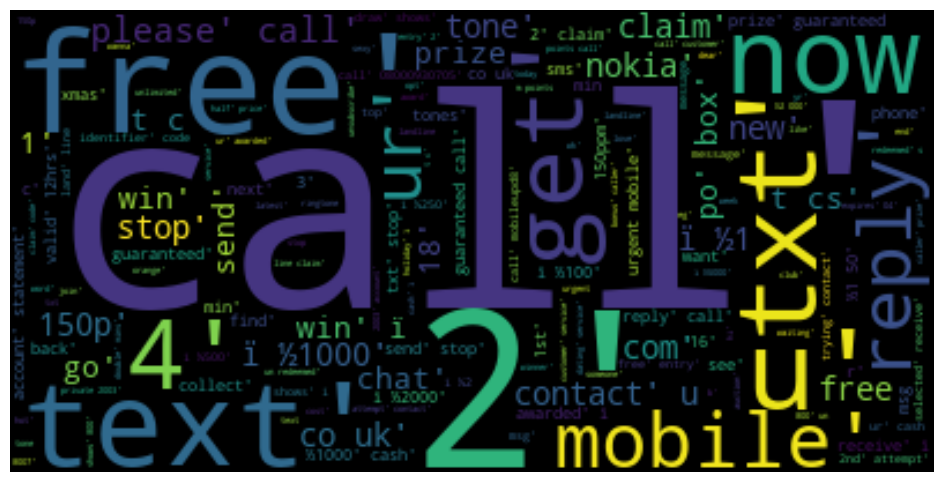

In [162]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wc = WordCloud()
spam_wc = wc.generate(spam_text)

# Convert word cloud to image
spam_image = spam_wc.to_image()

# Display the image
plt.figure(figsize=(15, 6))
plt.imshow(spam_image, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [163]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

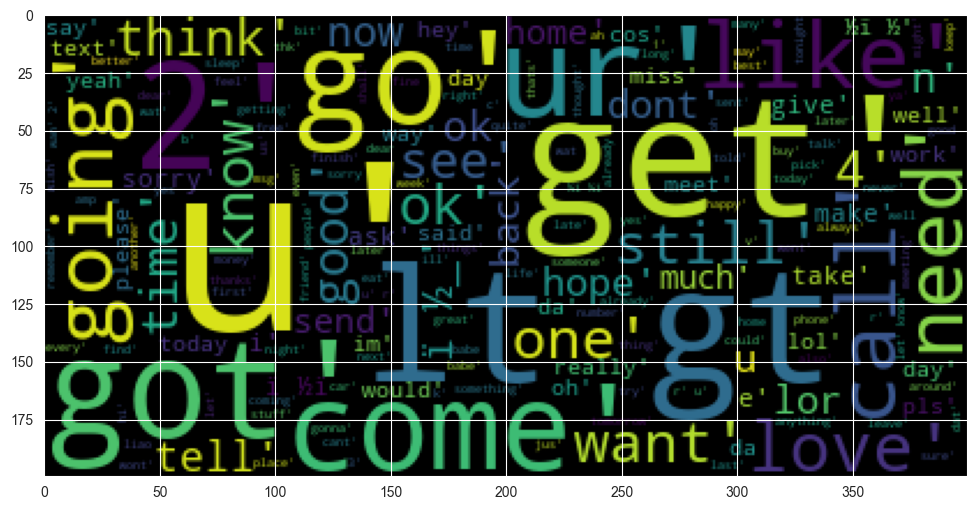

In [164]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [165]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point,', 'crazy..', 'availab..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar...', 'joking', 'wif', 'u', 'oni...']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'early', 'hor...', 'u', 'c..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goes', 'usf,', 'lives', 'aro..."


In [166]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [167]:
len(spam_corpus)

11075

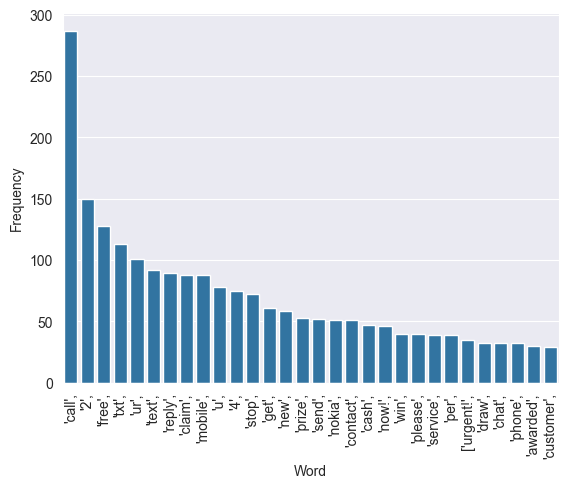

In [168]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is your list of words
spam_counter = Counter(spam_corpus)
most_common_words = spam_counter.most_common(30)
most_common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Create the bar plot
sns.barplot(x='Word', y='Frequency', data=most_common_words_df)
plt.xticks(rotation='vertical')
plt.show()



In [169]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [170]:
len(ham_corpus)

38352

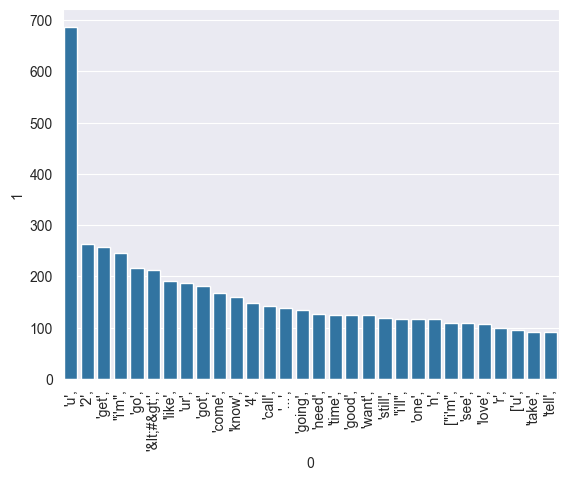

In [171]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Get the most common words and their counts from the Counter object
ham_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30))

# Create a bar plot
sns.barplot(x=ham_common_words[0], y=ham_common_words[1])
plt.xticks(rotation='vertical')
plt.show()


In [172]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point,', 'crazy..', 'availab..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar...', 'joking', 'wif', 'u', 'oni...']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entry', '2', 'wkly', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'early', 'hor...', 'u', 'c..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goes', 'usf,', 'lives', 'aro..."


## 4. Model Building

In [173]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [174]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [175]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [176]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [177]:
X.shape

(5169, 3000)

In [178]:
y = df['target'].values

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [181]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [182]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [183]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8936170212765957
[[805  91]
 [ 19 119]]
0.5666666666666667


In [184]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9806576402321083
[[896   0]
 [ 20 118]]
1.0


In [185]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [186]:
# tfidf --> MNB

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [188]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [189]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [190]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [191]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9825918762088974, np.float64(0.9838709677419355))

In [192]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9825918762088974
Precision -  0.9838709677419355
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9806576402321083
Precision -  1.0
For  DT
Accuracy -  0.9429400386847195
Precision -  0.883495145631068
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9816247582205029
Precision -  1.0


/opt/anaconda3/envs/AIDI/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9680851063829787
Precision -  0.9646017699115044
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.8846153846153846
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9758064516129032
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9108910891089109
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.9669421487603306


In [193]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [194]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.980658,1.000000
5,RF,0.981625,1.000000
0,SVC,0.982592,0.983871
8,ETC,0.980658,0.975806
10,xgb,0.975822,0.966942
6,AdaBoost,0.968085,0.964602
4,LR,0.955513,0.960000
9,GBDT,0.946809,0.910891
7,BgC,0.963250,0.884615


In [195]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [196]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.980658
2,RF,Accuracy,0.981625
3,SVC,Accuracy,0.982592
4,ETC,Accuracy,0.980658
5,xgb,Accuracy,0.975822
6,AdaBoost,Accuracy,0.968085
7,LR,Accuracy,0.955513
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.963250


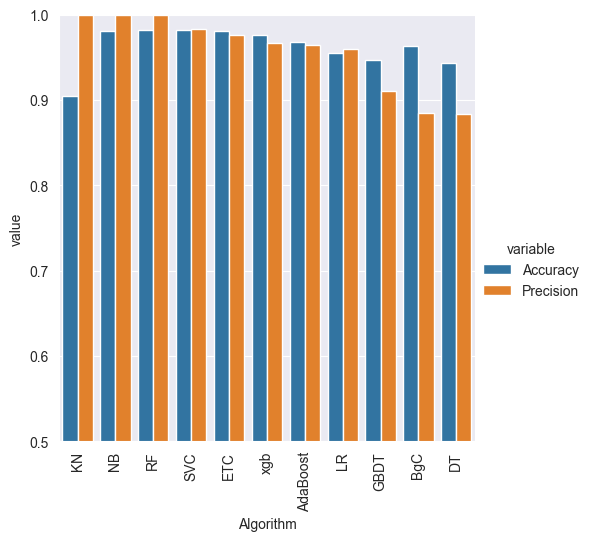

In [197]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [198]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [199]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [200]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [201]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [202]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [203]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [204]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.980658,1.000000,0.980658,1.000000,0.980658,1.000000,0.980658,1.000000
2,RF,0.981625,1.000000,0.981625,1.000000,0.981625,1.000000,0.981625,1.000000
3,SVC,0.982592,0.983871,0.982592,0.983871,0.982592,0.983871,0.982592,0.983871
4,ETC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
5,xgb,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
6,AdaBoost,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602,0.968085,0.964602
7,LR,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000,0.955513,0.960000
8,GBDT,0.946809,0.910891,0.946809,0.910891,0.946809,0.910891,0.946809,0.910891
9,BgC,0.963250,0.884615,0.963250,0.884615,0.963250,0.884615,0.963250,0.884615


In [205]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [206]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [207]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [208]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.984375


In [209]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [210]:
from sklearn.ensemble import StackingClassifier

In [211]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [212]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9626865671641791


In [213]:
import pickle

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Save the trained MultinomialNB model
with open('Model/model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('Model/vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
